# Set up

Python librairies imports :

In [1]:
!which pip

/opt/anaconda3/envs/Model2/bin/pip


In [2]:
!pip install missingno

In [3]:
!pip show missingno


Name: missingno
Version: 0.5.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: MIT License
Location: /opt/anaconda3/envs/Model2/lib/python3.12/site-packages
Requires: matplotlib, numpy, scipy, seaborn
Required-by: 


In [4]:
# File system management
import os

# Data manipulation
import numpy as np
import pandas as pd

# Data analysis
import missingno as msno

# Features engineering
from sklearn.preprocessing import LabelEncoder

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(palette="Set1")

Define work location :

In [5]:
project_path = "/Users/laureagrech/Desktop/oc7_streamlit"

# Change directory
os.chdir(project_path)

Load data :

In [6]:
# List csv files
csv_names = os.listdir("/Users/laureagrech/Desktop/oc7_streamlit/streamlit_dashboard/data/datasources")
print(csv_names)

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [7]:
# Load data
data_columns_desc = pd.read_csv("/Users/laureagrech/Desktop/oc/Projets OC/P7/data/HomeCredit_columns_description.csv",
                                encoding='latin1', index_col=[0])

data_app_train = pd.read_csv("/Users/laureagrech/Desktop/oc/Projets OC/P7/data/application_train.csv")

# Functions

## General functions

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df, name="The selected dataframe"):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print (name + " has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## Plot functions

In [9]:
# Display barplot
def display_barplot(data=None, x=None, y=None, title='Barplot', figsize=(8, 6),
                    order=None, palette=None, xrotation=0, ylabel=None):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.barplot(data=data, x=x, y=y, order=order, palette=palette)
    if ylabel is not None:
        plt.ylabel(ylabel)
    plt.xticks(rotation=xrotation)
    plt.show()


# Display histplot
def display_histplot(data, x=None, y=None, title='Histplot', figsize=(8, 6), kde=False, hue=None,
                     bins='auto'):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.histplot(data=data, x=x, y=y, kde=kde, hue=hue, bins=bins)
    plt.show()


# Display kdeplot
def display_kdeplot(data, x=None, y=None, title='KDEplot', figsize=(8, 6), hue=None, common_norm=True):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.kdeplot(data=data, x=x, y=y, hue=hue, common_norm=common_norm)
    plt.show()


# Display countplot
def display_countplot(data, x=None, y=None, title='Countplot', figsize=(8, 6),
                      order=None, xrotation=0):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.countplot(data=data, x=x, y=y, order=order)
    plt.xticks(rotation=xrotation)
    plt.show()


# Display scatterplot
def display_scatterplot(data, x=None, y=None, title='Scatterplot', figsize=(8, 8), hue=None, palette=None):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.scatterplot(data=data, x=x, y=y, hue=hue, palette=palette)
    if (hue is not None):
        plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
    plt.show()


# Display scatterplot
def display_scatterplot_annotate(data, x=None, y=None, title='Scatterplot', figsize=(8, 8), annotation='name'):
    plt.figure(figsize=figsize)
    plt.title(title)
    for i in range(data.shape[0]):
        pt_x = data[x].iloc[i]
        pt_y = data[y].iloc[i]
        pt_name = data[annotation].iloc[i]
        sns.scatterplot(x=[pt_x], y=[pt_y])
        plt.annotate(pt_name, xy=(pt_x, pt_y), xytext=(5, 2), textcoords='offset points',
                     ha='right', va='bottom')
    plt.tight_layout()
    plt.show()

In [10]:
# Display multi plot
def create_multi_plot(n_elements, title="Plot", figsize=None):

    # Compute size of plot
    if (n_elements < 4):
        n_rows = 1
        n_cols = n_elements
    elif (n_elements == 4):
        n_rows = 2
        n_cols = 2
    else:
        n_rows = (n_elements // 3 + 1) if (n_elements % 3 > 0) else (n_elements // 3)
        n_cols = 3

    # Init fig
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Flatten the list of axes
    axes = ax.flatten() if isinstance(ax, np.ndarray) else np.array(ax)

    # Title
    plt.suptitle(title)

    return fig, axes

In [11]:
# Display multi countplot
def display_multi_countplot(data, columns, title='Countplot', figsize=(20, 20),
                            order=None, xrotation=None):

    elem_n = len(columns)

    # Create subplots
    fig, axes = create_multi_plot(elem_n, title=title, figsize=figsize)

    for ax, elem in zip(axes, range(elem_n)):

        # Draw counplot
        sns.countplot(data=data, x=columns[elem], order=order, ax=ax)
        ax.title.set_text(columns[elem])

        if data[columns[elem]].dtypes == object:
            ax.tick_params(axis='x', labelrotation=xrotation)

    plt.tight_layout()
    plt.show()

In [12]:
# Display multi hue scatterplot
def display_multihue_scatterplot(data, x, y, hue_list, title, figsize=(20, 20)):

    elem_n = len(hue_list)

    # Create subplots
    fig, axes = create_multi_plot(elem_n, title=title, figsize=figsize)

    for ax, elem in zip(axes, range(elem_n)):
        hue = hue_list[elem]
        # Draw scatterplot
        sns.scatterplot(data=data, x=x, y=y, hue=hue, ax=ax,
                        palette=sns.color_palette("husl", data[hue].nunique()))
        ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
        ax.title.set_text(hue)

    plt.tight_layout()
    plt.show()

# Exploratory data analysis

In [13]:
from IPython.display import display, Image


url_image = 'home-credit.png'
display(Image(url=url_image))

**application_{train|test}.csv** <br>
Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.

**bureau.csv**<br>
Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).
Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.

**bureau_balance.csv**<br>
Soldes mensuels des crédits antérieurs au bureau de crédit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que le tableau a (nombre de prêts dans l'échantillon * nombre de crédits précédents relatifs * nombre de mois où nous avons un historique observable pour les crédits précédents) lignes.

**POS_CASH_balance.csv**<br>
Instantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit.
Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (nombre de prêts dans l'échantillon * nombre de crédits précédents relatifs * nombre de mois dans lequel nous avons un historique observable pour les lignes des crédits précédents).

**credit_card_balance.csv**<br>
Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (nombre de prêts dans l'échantillon * nombre de cartes de crédit précédentes relatives * nombre de mois où nous avons un historique observable pour la carte de crédit précédente) lignes.

**previous_application.csv**<br>
Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

**installments_payments.csv**<br>
Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon.
Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué.
Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier lié aux prêts de notre échantillon.

**HomeCredit_columns_description.csv**<br>
Ce fichier contient les descriptions des colonnes des différents fichiers de données.


In [14]:
try:
    noms = pd.read_csv("/Users/laureagrech/Desktop/oc7_streamlit/streamlit_dashboard/data/datasources/HomeCredit_columns_description.csv", encoding='utf-8')  # UTF-8 encoding
except UnicodeDecodeError:
    try:
        noms = pd.read_csv("/Users/laureagrech/Desktop/oc7_streamlit/streamlit_dashboard/data/datasources/HomeCredit_columns_description.csv", encoding='ISO-8859-1')  # ISO-8859-1 encoding
    except UnicodeDecodeError:
        noms = pd.read_csv("/Users/laureagrech/Desktop/oc7_streamlit/streamlit_dashboard/data/datasources/HomeCredit_columns_description.csv", encoding='cp1252')  # Windows specific encoding`

In [15]:
import os

path_to_csv = "/Users/laureagrech/Desktop/oc7_streamlit/streamlit_dashboard/data/datasources/"

path_app_train = os.path.join(path_to_csv, "application_train.csv")
path_app_test = os.path.join(path_to_csv, "application_test.csv")
path_bureau = os.path.join(path_to_csv, "bureau.csv")
path_bureau_bal = os.path.join(path_to_csv, "bureau_balance.csv")
path_credit_card = os.path.join(path_to_csv, "credit_card_balance.csv")
path_description = os.path.join(path_to_csv, "HomeCredit_columns_description.csv")
path_installements= os.path.join(path_to_csv, "installments_payments.csv")
path_pos_cash = os.path.join(path_to_csv, "POS_CASH_balance.csv")
path_previous_app = os.path.join(path_to_csv, "previous_application.csv")
app_train = pd.read_csv(path_app_train, encoding="utf-8")
app_test = pd.read_csv(path_app_test, encoding="utf-8")
bureau = pd.read_csv(path_bureau, encoding="utf-8")
bureau_bal = pd.read_csv(path_bureau_bal, encoding="utf-8")
credit_card = pd.read_csv(path_credit_card, encoding="utf-8")
installments = pd.read_csv(path_installements, encoding="utf-8")
pos_cash = pd.read_csv(path_pos_cash, encoding="utf-8")
previous_app = pd.read_csv(path_previous_app, encoding="utf-8")

In [16]:
list_dataset = [app_train, app_test, bureau, bureau_bal, credit_card, installments, pos_cash, previous_app]

list_dataset_names = ['app_train', 'app_test', 'bureau', 'bureau_bal', 'credit_card', 'installments', 'pos_cash', 'previous_app']

dataset_descriptions = {
    'app_train': "application_train.csv\nIl s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET). Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.",
    'app_test': "application_test.csv\nIl s'agit de la table principale, divisée en deux fichiers pour Test (sans TARGET). Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.",
    'bureau': "bureau.csv\nTous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon). Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.",
    'bureau_bal': "bureau_balance.csv\nSoldes mensuels des crédits antérieurs au bureau de crédit. Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que le tableau a (nombre de prêts dans l'échantillon * nombre de crédits précédents relatifs * nombre de mois où nous avons un historique observable pour les crédits précédents) lignes.",
    'credit_card': "credit_card_balance.csv\nAperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit. Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (nombre de prêts dans l'échantillon * nombre de cartes de crédit précédentes relatives * nombre de mois où nous avons un historique observable pour la carte de crédit précédente) lignes.",
    'installments': "installments_payments.csv\nHistorique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon. Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué. Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier lié aux prêts de notre échantillon.",
    'pos_cash': "POS_CASH_balance.csv\nInstantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit. Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (nombre de prêts dans l'échantillon * nombre de crédits précédents relatifs * nombre de mois dans lequel nous avons un historique observable pour les lignes des crédits précédents).",
    'previous_app': "previous_application.csv\nToutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon. Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données."
}

name_mapping = {
    'app_train': 'application_{train|test}.csv',
    'app_test': 'application_{train|test}.csv',
    'bureau': 'bureau.csv',
    'bureau_bal': 'bureau_balance.csv',
    'credit_card': 'credit_card_balance.csv',
    'installments': 'installments_payments.csv',
    'pos_cash': 'POS_CASH_balance.csv',
    'previous_app': 'previous_application.csv'
}
"""
column_descriptions = noms.groupby('Table').apply(lambda x: x[['Row', 'Description']].set_index('Row').to_dict()['Description']).to_dict()
for name, dataset in zip(list_dataset_names, list_dataset):
    print(f"Nom du dataset : {name}")
    print(f"Description : {dataset_descriptions[name]}")
    display(dataset.head())  # Affiche les premières lignes du dataset
    print(f"Forme du dataset : {dataset.shape}")
    print("\n")  # Ajoute une ligne vide pour une meilleure lisibilité
    
    # Utiliser le dictionnaire de correspondance pour récupérer le nom de fichier correct
    file_name = name_mapping[name]
    
    # Afficher la description des colonnes
    if file_name in column_descriptions:
        print("Descriptions des colonnes :")
        for col, desc in column_descriptions[file_name].items():
            print(f" - {col}: {desc}")
    else:
        print("Pas de description de colonnes disponible pour ce dataset.")
    
    print("\n")  # Ajoute une ligne vide pour une meilleure lisibilité
"""

'\ncolumn_descriptions = noms.groupby(\'Table\').apply(lambda x: x[[\'Row\', \'Description\']].set_index(\'Row\').to_dict()[\'Description\']).to_dict()\nfor name, dataset in zip(list_dataset_names, list_dataset):\n    print(f"Nom du dataset : {name}")\n    print(f"Description : {dataset_descriptions[name]}")\n    display(dataset.head())  # Affiche les premières lignes du dataset\n    print(f"Forme du dataset : {dataset.shape}")\n    print("\n")  # Ajoute une ligne vide pour une meilleure lisibilité\n    \n    # Utiliser le dictionnaire de correspondance pour récupérer le nom de fichier correct\n    file_name = name_mapping[name]\n    \n    # Afficher la description des colonnes\n    if file_name in column_descriptions:\n        print("Descriptions des colonnes :")\n        for col, desc in column_descriptions[file_name].items():\n            print(f" - {col}: {desc}")\n    else:\n        print("Pas de description de colonnes disponible pour ce dataset.")\n    \n    print("\n")  # Ajout

In [17]:
column_descriptions = noms.groupby('Table').apply(lambda x: x[['Row', 'Description']].set_index('Row').to_dict()['Description']).to_dict()

for name, dataset in zip(list_dataset_names, list_dataset):
    print(f"Nom du dataset : {name}")
    print(f"Description : {dataset_descriptions[name]}")
    print(f"Drows and columns in the dataset : {dataset.shape}")
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    display(dataset.head()) 
    print(f"Forme du dataset : {dataset.shape}\n")  
    # Uses dictionary mapping to get the right file
    file_name = name_mapping[name]
    
    # Shows the descriptions of the columns
    if file_name in column_descriptions:
        print("Descriptions des colonnes :")
        # Creates a dataframe with descriptions of columns
        col_desc_df = pd.DataFrame(list(column_descriptions[file_name].items()), columns=['Colonne', 'Description'])
        display(col_desc_df) 
    else:
        print("Pas de description de colonnes disponible pour ce dataset.")
    
    print("\n") 

Nom du dataset : app_train
Description : application_train.csv
Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET). Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.
Drows and columns in the dataset : (307511, 122)


/var/folders/t0/bk4v248j27n4pms6k42stgrm0000gn/T/ipykernel_58074/2203253929.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  column_descriptions = noms.groupby('Table').apply(lambda x: x[['Row', 'Description']].set_index('Row').to_dict()['Description']).to_dict()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Forme du dataset : (307511, 122)

Descriptions des colonnes :


,Colonne,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,CNT_CHILDREN,Number of children the client has
7,AMT_INCOME_TOTAL,Income of the client
8,AMT_CREDIT,Credit amount of the loan
9,AMT_ANNUITY,Loan annuity




Nom du dataset : app_test
Description : application_test.csv
Il s'agit de la table principale, divisée en deux fichiers pour Test (sans TARGET). Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.
Drows and columns in the dataset : (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

Forme du dataset : (48744, 121)

Descriptions des colonnes :


,Colonne,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,CNT_CHILDREN,Number of children the client has
7,AMT_INCOME_TOTAL,Income of the client
8,AMT_CREDIT,Credit amount of the loan
9,AMT_ANNUITY,Loan annuity




Nom du dataset : bureau
Description : bureau.csv
Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon). Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.
Drows and columns in the dataset : (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Forme du dataset : (1716428, 17)

Descriptions des colonnes :


,Colonne,Description
0,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau"
1,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)
2,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits
3,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit
4,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit
5,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample
6,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit
7,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit)
8,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)
9,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged




Nom du dataset : bureau_bal
Description : bureau_balance.csv
Soldes mensuels des crédits antérieurs au bureau de crédit. Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que le tableau a (nombre de prêts dans l'échantillon * nombre de crédits précédents relatifs * nombre de mois où nous avons un historique observable pour les crédits précédents) lignes.
Drows and columns in the dataset : (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


Forme du dataset : (27299925, 3)

Descriptions des colonnes :


,Colonne,Description
0,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table
1,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date)
2,STATUS,"Status of Credit Bureau loan during the month (active, closed, DPD0-30, [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60, 5 means DPD 120+ or sold or written off ] )"




Nom du dataset : credit_card
Description : credit_card_balance.csv
Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit. Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (nombre de prêts dans l'échantillon * nombre de cartes de crédit précédentes relatives * nombre de mois où nous avons un historique observable pour la carte de crédit précédente) lignes.
Drows and columns in the dataset : (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


Forme du dataset : (3840312, 23)

Descriptions des colonnes :


,Colonne,Description
0,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)"
1,SK_ID_CURR,ID of loan in our sample
2,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date)
3,AMT_BALANCE,Balance during the month of previous credit
4,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the previous credit
5,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the previous credit
6,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previous credit
7,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of the previous credit
8,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the month of the previous credit
9,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the previous credit




Nom du dataset : installments
Description : installments_payments.csv
Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon. Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué. Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier lié aux prêts de notre échantillon.
Drows and columns in the dataset : (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


Forme du dataset : (13605401, 8)

Descriptions des colonnes :


,Colonne,Description
0,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)"
1,SK_ID_CURR,ID of loan in our sample
2,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed
3,NUM_INSTALMENT_NUMBER,On which installment we observe payment
4,DAYS_INSTALMENT,When the installment of previous credit was supposed to be paid (relative to application date of current loan)
5,DAYS_ENTRY_PAYMENT,When was the installments of previous credit paid actually (relative to application date of current loan)
6,AMT_INSTALMENT,What was the prescribed installment amount of previous credit on this installment
7,AMT_PAYMENT,What the client actually paid on previous credit on this installment




Nom du dataset : pos_cash
Description : POS_CASH_balance.csv
Instantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit. Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (nombre de prêts dans l'échantillon * nombre de crédits précédents relatifs * nombre de mois dans lequel nous avons un historique observable pour les lignes des crédits précédents).
Drows and columns in the dataset : (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


Forme du dataset : (10001358, 8)

Descriptions des colonnes :


,Colonne,Description
0,SK_ID_PREV,"ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)"
1,SK_ID_CURR,ID of loan in our sample
2,MONTHS_BALANCE,"Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )"
3,CNT_INSTALMENT,Term of previous credit (can change over time)
4,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit
5,NAME_CONTRACT_STATUS,Contract status during the month
6,SK_DPD,DPD (days past due) during the month of previous credit
7,SK_DPD_DEF,DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit




Nom du dataset : previous_app
Description : previous_application.csv
Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon. Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.
Drows and columns in the dataset : (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Forme du dataset : (1670214, 37)

Descriptions des colonnes :


,Colonne,Description
0,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)"
1,SK_ID_CURR,ID of loan in our sample
2,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application"
3,AMT_ANNUITY,Annuity of previous application
4,AMT_APPLICATION,For how much credit did client ask on the previous application
5,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT"
6,AMT_DOWN_PAYMENT,Down payment on the previous application
7,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application
8,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application
9,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application


## General information

I display the general information on the dataset.

In [18]:
# Display info
display(data_app_train.info())

# Display first rows
print("\nFirst rows: ")
display(data_app_train.head(5))

# Display description
print("\nNumerical columns description: ")
display(data_app_train.describe(include=[np.number]))
print("\nCategorical columns description: ")
display(data_app_train.describe(exclude=[np.number]))

print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None


First rows: 


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


Numerical columns description: 


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97


Categorical columns description: 


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [19]:
# Display info
display(app_test.info())

# Display first rows
print("\nFirst rows: ")
display(app_test.head(5))

# Display description
print("\nNumerical columns description: ")
display(app_test.describe(include=[np.number]))
print("\nCategorical columns description: ")
display(app_test.describe(exclude=[np.number]))

print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


None


First rows: 


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married


Numerical columns description: 


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,0.067192,0.105885,0.112286,0.009231,0.029387,0.119078,0.088998,0.978292,0.758327,0.045223,0.080570,0.147161,0.229390,0.233854,0.065914,0.110874,0.110687,0.008358,0.028161,0.122809,0.089529,0.978822,0.754344,0.047420,0.084128,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,


Categorical columns description: 


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,48744,48744,48744,48744,47833,48744,48744,48744,48744,33139,48744,48744,15947,25125,24851,26535
unique,2,2,2,2,7,7,5,5,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,48305,32678,32311,33658,39727,24533,33988,32283,43645,8655,9751,10840,12124,24659,11269,26179


In [20]:
app_train.duplicated().sum()

0

In [21]:
app_test.duplicated().sum()

0

I use the **HomeCredit_columns_description** dataset to display the columns descriptions of the **application_train** dataset.

In [22]:
data_columns_desc.head()

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [26]:
pwd

'/Users/laureagrech/Desktop/oc7_streamlit'

In [30]:
merged_df_train = pd.read_csv("/Users/laureagrech/Desktop/oc7_streamlit/streamlit_dashboard/data/processed/train_feature_engineering.csv")

In [31]:
merged_df_test = pd.read_csv("/Users/laureagrech/Desktop/oc7_streamlit/streamlit_dashboard/data/processed/test_feature_engineering.csv")

In [32]:
merged_df_train_sample = pd.read_csv("/Users/laureagrech/Desktop/oc7_streamlit/streamlit_dashboard/data/processed/train_feature_engineering_sample.csv")

In [33]:
merged_df_train_sample.duplicated().sum()

0

In [34]:
merged_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307507 entries, 0 to 307506
Columns: 608 entries, Unnamed: 0 to CC_NAME_CONTRACT_STATUS_nan_VAR
dtypes: bool(127), float64(421), int64(44), object(16)
memory usage: 1.1+ GB


In [44]:
# Total of cells in the datadrame
total_cells = merged_df_test.size

# Total number of missing values
total_missing = merged_df_test.isna().sum().sum()

# percentage of missing values in the dataser
missing_percentage_total = (total_missing / total_cells) * 100

# Results
print(f"Pourcentage total de valeurs manquantes : {missing_percentage_total:.2f}% soit {total_missing} valeurs manquantes sur un nombre total de {total_cells} valeurs")

Pourcentage total de valeurs manquantes : 16.74% soit 4959895 valeurs manquantes sur un nombre total de 29635136 valeurs


<Axes: >

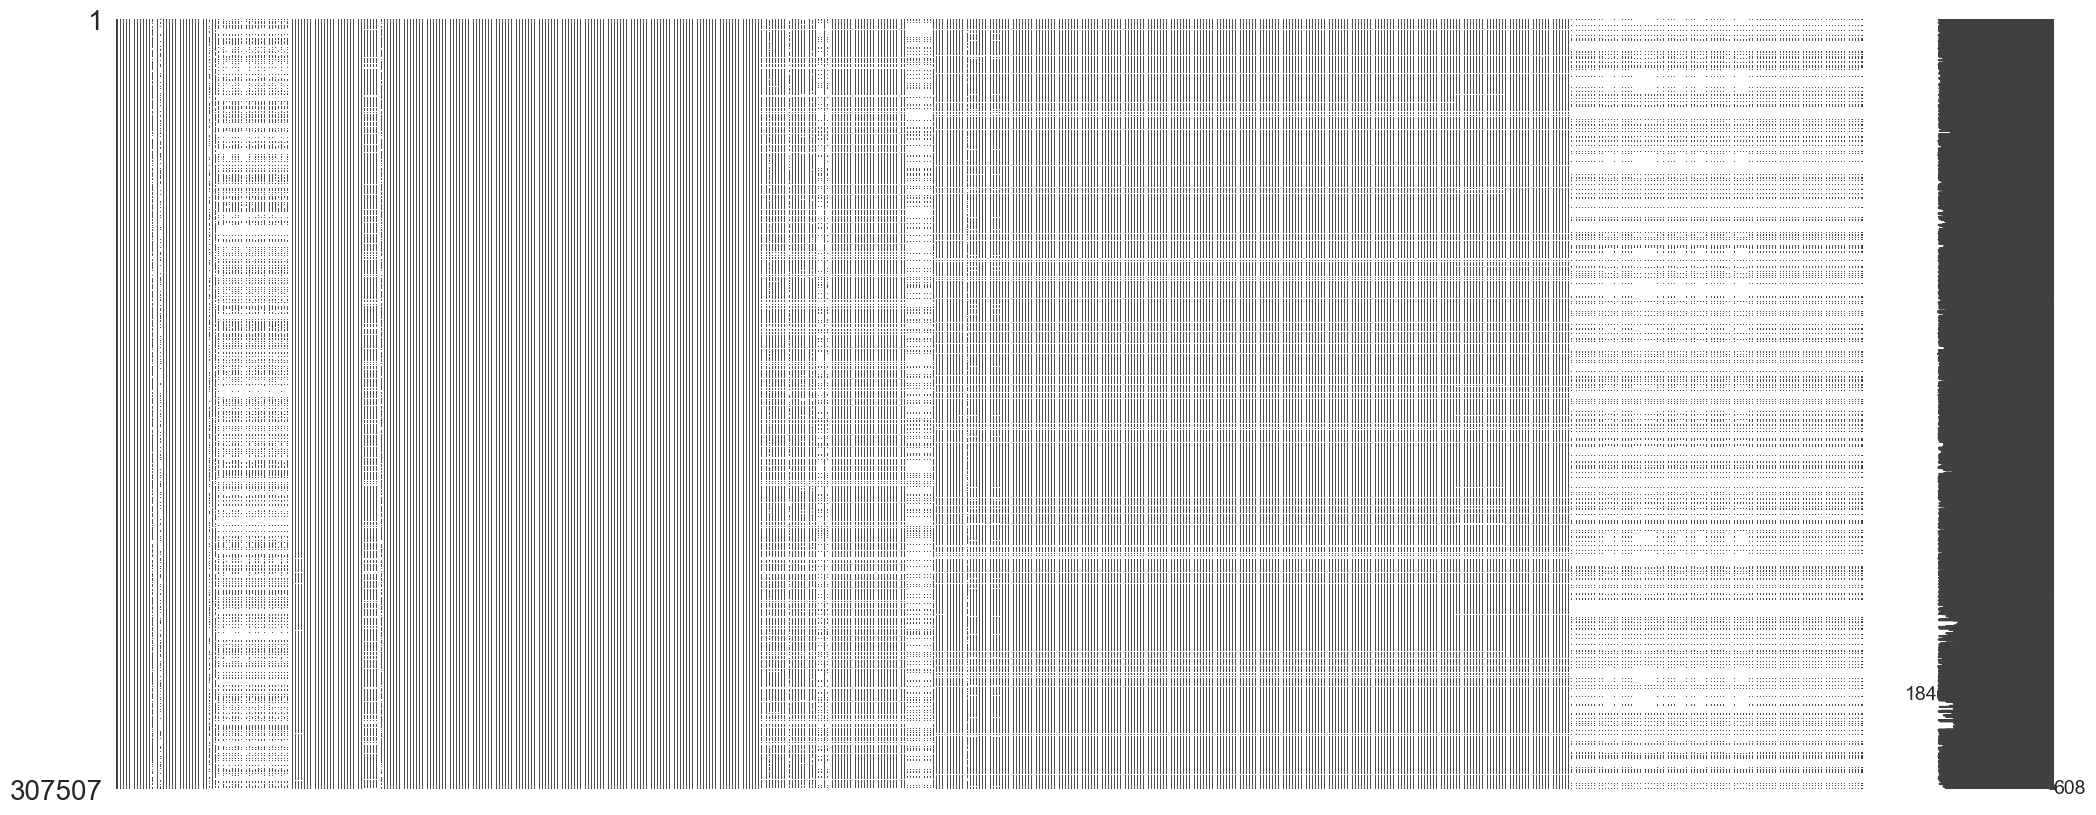

In [37]:
msno.matrix(merged_df_train) 

In [38]:
merged_df_test_sample = pd.read_csv("/Users/laureagrech/Desktop/oc7_streamlit/streamlit_dashboard/data/processed/test_feature_engineering_sample.csv")

In [39]:
merged_df_test_sample.duplicated().sum()

0

In [49]:
merged_df_train_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Columns: 608 entries, SK_ID_CURR to CC_NAME_CONTRACT_STATUS_nan_VAR
dtypes: bool(127), float64(422), int64(43), object(16)
memory usage: 116.6+ MB


In [40]:
merged_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48742 entries, 0 to 48741
Columns: 608 entries, Unnamed: 0 to CC_NAME_CONTRACT_STATUS_nan_VAR
dtypes: bool(127), float64(421), int64(44), object(16)
memory usage: 184.8+ MB


In [45]:
merged_df_test.shape

(48742, 608)

In [46]:
merged_df_test_sample.shape

(4874, 607)

In [42]:
merged_df_test_sample.isna().sum().sum()

493103

In [51]:
# Total of cells in the datadrame
total_cells = merged_df_train_sample.size

# Total number of missing values
total_missing = merged_df_train_sample.isna().sum().sum()

# percentage of missing values in the dataser
missing_percentage_total = (total_missing / total_cells) * 100

# Results
print(f"Pourcentage total de valeurs manquantes : {missing_percentage_total:.2f}% soit {total_missing} valeurs manquantes sur un nombre total de {total_cells} valeurs")

Pourcentage total de valeurs manquantes : 20.13% soit 3764273 valeurs manquantes sur un nombre total de 18696608 valeurs


In [53]:
merged_df = merged_df_train.copy()

In [55]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307507 entries, 0 to 307506
Columns: 608 entries, Unnamed: 0 to CC_NAME_CONTRACT_STATUS_nan_VAR
dtypes: bool(127), float64(421), int64(44), object(16)
memory usage: 1.1+ GB


In [54]:
# Creates the new structure for the dictionnary to acces descriptions
flat_descriptions = {}
for dataset, cols in column_descriptions.items():
    for col, desc in cols.items():
        flat_descriptions[col] = desc  # Flatten rthe dictionary

# Columns from merged_df with description
columns_with_description = set([col for col in merged_df.columns if col in flat_descriptions])

# Display descriptions of columns
descriptions_data = {'Colonne': [], 'Description': []}
for col in columns_with_description:
    descriptions_data['Colonne'].append(col)
    descriptions_data['Description'].append(flat_descriptions[col])

description_df = pd.DataFrame(descriptions_data)
display(description_df)

,Colonne,Description
0,AMT_ANNUITY,Annuity of previous application
1,FLAG_DOCUMENT_14,Did client provide document 14
2,FLAG_WORK_PHONE,"Did client provide home phone (1=YES, 0=NO)"
3,ELEVATORS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
4,APARTMENTS_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
5,DAYS_LAST_PHONE_CHANGE,How many days before application did client change phone
6,FLAG_DOCUMENT_8,Did client provide document 8
7,DAYS_REGISTRATION,How many days before the application did client change his registration
8,BASEMENTAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
9,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT"


In [56]:
# Columns of merged_df without a description
columns_without_description = set(merged_df.columns) - columns_with_description

# display of columns without a description
print("Colonnes sans description :", columns_without_description)

Colonnes sans description : {'PREV_NAME_TYPE_SUITE_Spouse, partner_MEAN', 'PREV_NAME_CONTRACT_TYPE_nan_MEAN', 'PREV_NAME_GOODS_CATEGORY_Consumer Electronics_MEAN', 'ORGANIZATION_TYPE_Security', 'ORGANIZATION_TYPE_Trade: type 5', 'BURO_CREDIT_TYPE_Cash loan (non-earmarked)_MEAN', 'ORGANIZATION_TYPE_Bank', 'CC_AMT_PAYMENT_CURRENT_MIN', 'PREV_NAME_PORTFOLIO_Cash_MEAN', 'PREV_NAME_SELLER_INDUSTRY_XNA_MEAN', 'POS_NAME_CONTRACT_STATUS_Signed_MEAN', 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN', 'CC_NAME_CONTRACT_STATUS_Sent proposal_MIN', 'BURO_STATUS_nan_MEAN_MEAN', 'ORGANIZATION_TYPE_Military', 'PREV_NAME_GOODS_CATEGORY_Weapon_MEAN', 'CC_NAME_CONTRACT_STATUS_Refused_MAX', 'PREV_CHANNEL_TYPE_Stone_MEAN', 'POS_NAME_CONTRACT_STATUS_Approved_MEAN', 'ORGANIZATION_TYPE_Transport: type 3', 'CC_CNT_DRAWINGS_ATM_CURRENT_VAR', 'HOUSETYPE_MODE_terraced house', 'PREV_NAME_GOODS_CATEGORY_Tourism_MEAN', 'CC_SK_DPD_MAX', 'PREV_PRODUCT_COMBINATION_Card X-Sell_MEAN', 'NAME_HOUSING_TYPE_With parents', 'P

In [57]:
merged_df.shape

(307507, 608)

In [58]:
# Display of columns with a description
print(f"{len(columns_with_description)} variables dans le dataset fusionné avec description :", columns_with_description)
description_df = pd.DataFrame(descriptions_data)
description_df_sorted = description_df.sort_values(by='Colonne', ascending=True)
display(description_df_sorted)

91 variables dans le dataset fusionné avec description : {'AMT_ANNUITY', 'FLAG_DOCUMENT_14', 'FLAG_WORK_PHONE', 'ELEVATORS_AVG', 'APARTMENTS_MODE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_8', 'DAYS_REGISTRATION', 'BASEMENTAREA_AVG', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START', 'TOTALAREA_MODE', 'FLAG_PHONE', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT', 'BASEMENTAREA_MODE', 'EXT_SOURCE_2', 'NONLIVINGAREA_MODE', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_OWN_CAR', 'NONLIVINGAREA_AVG', 'LIVE_CITY_NOT_WORK_CITY', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_6', 'ELEVATORS_MODE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_17', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_DOCUMENT_11', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_20', 'NAME_CONTRACT_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_15', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_CONT_MOBILE', 'APARTMENTS_AVG', 'FLOORSMAX_AVG', 'LIVINGAPARTMENTS_AVG', 

,Colonne,Description
0,AMT_ANNUITY,Annuity of previous application
9,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT"
53,AMT_INCOME_TOTAL,Income of the client
65,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
37,AMT_REQ_CREDIT_BUREAU_HOUR,Number of enquiries to Credit Bureau about the client one hour before application
78,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
30,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
39,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
84,AMT_REQ_CREDIT_BUREAU_YEAR,Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)
42,APARTMENTS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"


In [59]:
# Display columns without descriptions
print("Colonnes sans description :",f"{len(columns_without_description)} nouvelles variables :")
no_description_df = pd.DataFrame(list(columns_without_description), columns=['Colonne'])
no_description_df_sorted = no_description_df.sort_values(by='Colonne', ascending=True)
no_description_df_sorted['Description'] = 'Pas de description'
display(no_description_df_sorted)

Colonnes sans description : 517 nouvelles variables :


,Colonne,Description
403,ANNUITY_INCOME_PERCENT,Pas de description
36,BURO_AMT_ANNUITY_MAX,Pas de description
297,BURO_AMT_ANNUITY_MEAN,Pas de description
367,BURO_AMT_CREDIT_MAX_OVERDUE_MEAN,Pas de description
183,BURO_AMT_CREDIT_SUM_DEBT_MAX,Pas de description
109,BURO_AMT_CREDIT_SUM_DEBT_MEAN,Pas de description
208,BURO_AMT_CREDIT_SUM_DEBT_SUM,Pas de description
126,BURO_AMT_CREDIT_SUM_LIMIT_MEAN,Pas de description
314,BURO_AMT_CREDIT_SUM_LIMIT_SUM,Pas de description
153,BURO_AMT_CREDIT_SUM_MAX,Pas de description


In [60]:
# 'column_descriptions' est le dictionnaire contenant les descriptions pour chaque fichier après la fusion
all_described_columns = set()
for descriptions in column_descriptions.values():
    all_described_columns.update(descriptions.keys())

In [61]:
# Name of all columns in merged_columns
merged_columns = set(merged_df.columns)

# Find columns where there is a description
columns_with_description = merged_columns.intersection(all_described_columns)

# Shows description
print("Colonnes avec description :", columns_with_description)

Colonnes avec description : {'AMT_ANNUITY', 'FLAG_DOCUMENT_14', 'FLAG_WORK_PHONE', 'APARTMENTS_MODE', 'ELEVATORS_AVG', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_8', 'DAYS_REGISTRATION', 'BASEMENTAREA_AVG', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START', 'TOTALAREA_MODE', 'FLAG_PHONE', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT', 'BASEMENTAREA_MODE', 'EXT_SOURCE_2', 'NONLIVINGAREA_MODE', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_OWN_CAR', 'NONLIVINGAREA_AVG', 'LIVE_CITY_NOT_WORK_CITY', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_6', 'ELEVATORS_MODE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_17', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_DOCUMENT_11', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_20', 'NAME_CONTRACT_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_15', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_CONT_MOBILE', 'APARTMENTS_AVG', 'FLOORSMAX_AVG', 'LIVINGAPARTMENTS_AVG', 'FLAG_DOCUMENT_19', 'FLAG_DOC

In [62]:
len(columns_with_description)

91

In [63]:
# Shows description of columns
for col in columns_with_description:
    print(f" - {col}: {column_descriptions.get(col, 'Aucune description disponible')}")

 - AMT_ANNUITY: Aucune description disponible
 - FLAG_DOCUMENT_14: Aucune description disponible
 - FLAG_WORK_PHONE: Aucune description disponible
 - APARTMENTS_MODE: Aucune description disponible
 - ELEVATORS_AVG: Aucune description disponible
 - DAYS_LAST_PHONE_CHANGE: Aucune description disponible
 - FLAG_DOCUMENT_8: Aucune description disponible
 - DAYS_REGISTRATION: Aucune description disponible
 - BASEMENTAREA_AVG: Aucune description disponible
 - AMT_CREDIT: Aucune description disponible
 - HOUR_APPR_PROCESS_START: Aucune description disponible
 - TOTALAREA_MODE: Aucune description disponible
 - FLAG_PHONE: Aucune description disponible
 - DAYS_EMPLOYED: Aucune description disponible
 - REGION_RATING_CLIENT: Aucune description disponible
 - BASEMENTAREA_MODE: Aucune description disponible
 - EXT_SOURCE_2: Aucune description disponible
 - NONLIVINGAREA_MODE: Aucune description disponible
 - REGION_RATING_CLIENT_W_CITY: Aucune description disponible
 - FLAG_DOCUMENT_2: Aucune desc

In [64]:
# Creates the new structure for the dictionnary to acces descriptions
flat_descriptions = {}
for dataset, cols in column_descriptions.items():
    for col, desc in cols.items():
        flat_descriptions[col] = desc  # Aplatir le dictionnaire

# Columns from merged_df with description
columns_with_description = set([col for col in merged_df.columns if col in flat_descriptions])

# Display descriptions of columns
descriptions_data = {'Colonne': [], 'Description': []}
for col in columns_with_description:
    descriptions_data['Colonne'].append(col)
    descriptions_data['Description'].append(flat_descriptions[col])

description_df = pd.DataFrame(descriptions_data)
print(description_df.shape)
display(description_df)

(91, 2)


,Colonne,Description
0,AMT_ANNUITY,Annuity of previous application
1,FLAG_DOCUMENT_14,Did client provide document 14
2,FLAG_WORK_PHONE,"Did client provide home phone (1=YES, 0=NO)"
3,ELEVATORS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
4,APARTMENTS_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
5,DAYS_LAST_PHONE_CHANGE,How many days before application did client change phone
6,FLAG_DOCUMENT_8,Did client provide document 8
7,DAYS_REGISTRATION,How many days before the application did client change his registration
8,BASEMENTAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
9,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT"


In [65]:
# Columns of merged_df without description
columns_without_description = set(merged_df.columns) - columns_with_description

# Display columns with missing descriptions
print("Colonnes sans description :", columns_without_description)

Colonnes sans description : {'PREV_NAME_TYPE_SUITE_Spouse, partner_MEAN', 'PREV_NAME_CONTRACT_TYPE_nan_MEAN', 'PREV_NAME_GOODS_CATEGORY_Consumer Electronics_MEAN', 'ORGANIZATION_TYPE_Security', 'ORGANIZATION_TYPE_Trade: type 5', 'BURO_CREDIT_TYPE_Cash loan (non-earmarked)_MEAN', 'ORGANIZATION_TYPE_Bank', 'CC_AMT_PAYMENT_CURRENT_MIN', 'PREV_NAME_PORTFOLIO_Cash_MEAN', 'PREV_NAME_SELLER_INDUSTRY_XNA_MEAN', 'POS_NAME_CONTRACT_STATUS_Signed_MEAN', 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN', 'CC_NAME_CONTRACT_STATUS_Sent proposal_MIN', 'BURO_STATUS_nan_MEAN_MEAN', 'ORGANIZATION_TYPE_Military', 'PREV_NAME_GOODS_CATEGORY_Weapon_MEAN', 'CC_NAME_CONTRACT_STATUS_Refused_MAX', 'PREV_CHANNEL_TYPE_Stone_MEAN', 'POS_NAME_CONTRACT_STATUS_Approved_MEAN', 'ORGANIZATION_TYPE_Transport: type 3', 'CC_CNT_DRAWINGS_ATM_CURRENT_VAR', 'HOUSETYPE_MODE_terraced house', 'PREV_NAME_GOODS_CATEGORY_Tourism_MEAN', 'CC_SK_DPD_MAX', 'PREV_PRODUCT_COMBINATION_Card X-Sell_MEAN', 'NAME_HOUSING_TYPE_With parents', 'P

In [66]:
descriptions_data = {'Colonne': [], 'Description': []}
for col in columns_with_description:
    descriptions_data['Colonne'].append(col)
    descriptions_data['Description'].append(column_descriptions.get(col, 'Aucune description disponible'))

description_df = pd.DataFrame(descriptions_data)

display(description_df)

,Colonne,Description
0,AMT_ANNUITY,Aucune description disponible
1,FLAG_DOCUMENT_14,Aucune description disponible
2,FLAG_WORK_PHONE,Aucune description disponible
3,ELEVATORS_AVG,Aucune description disponible
4,APARTMENTS_MODE,Aucune description disponible
5,DAYS_LAST_PHONE_CHANGE,Aucune description disponible
6,FLAG_DOCUMENT_8,Aucune description disponible
7,DAYS_REGISTRATION,Aucune description disponible
8,BASEMENTAREA_AVG,Aucune description disponible
9,AMT_CREDIT,Aucune description disponible


In [67]:
# Display description of application table
display(data_columns_desc[data_columns_desc['Table'] == "application_{train|test}.csv"])

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


## Missing values

Let's check the dataset missing values.

In [68]:
# Create missing values dataframe
missing_values = missing_values_table(data_app_train, "application_train")
display(missing_values.head(20))

application_train has 122 columns.
There are 67 columns with missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


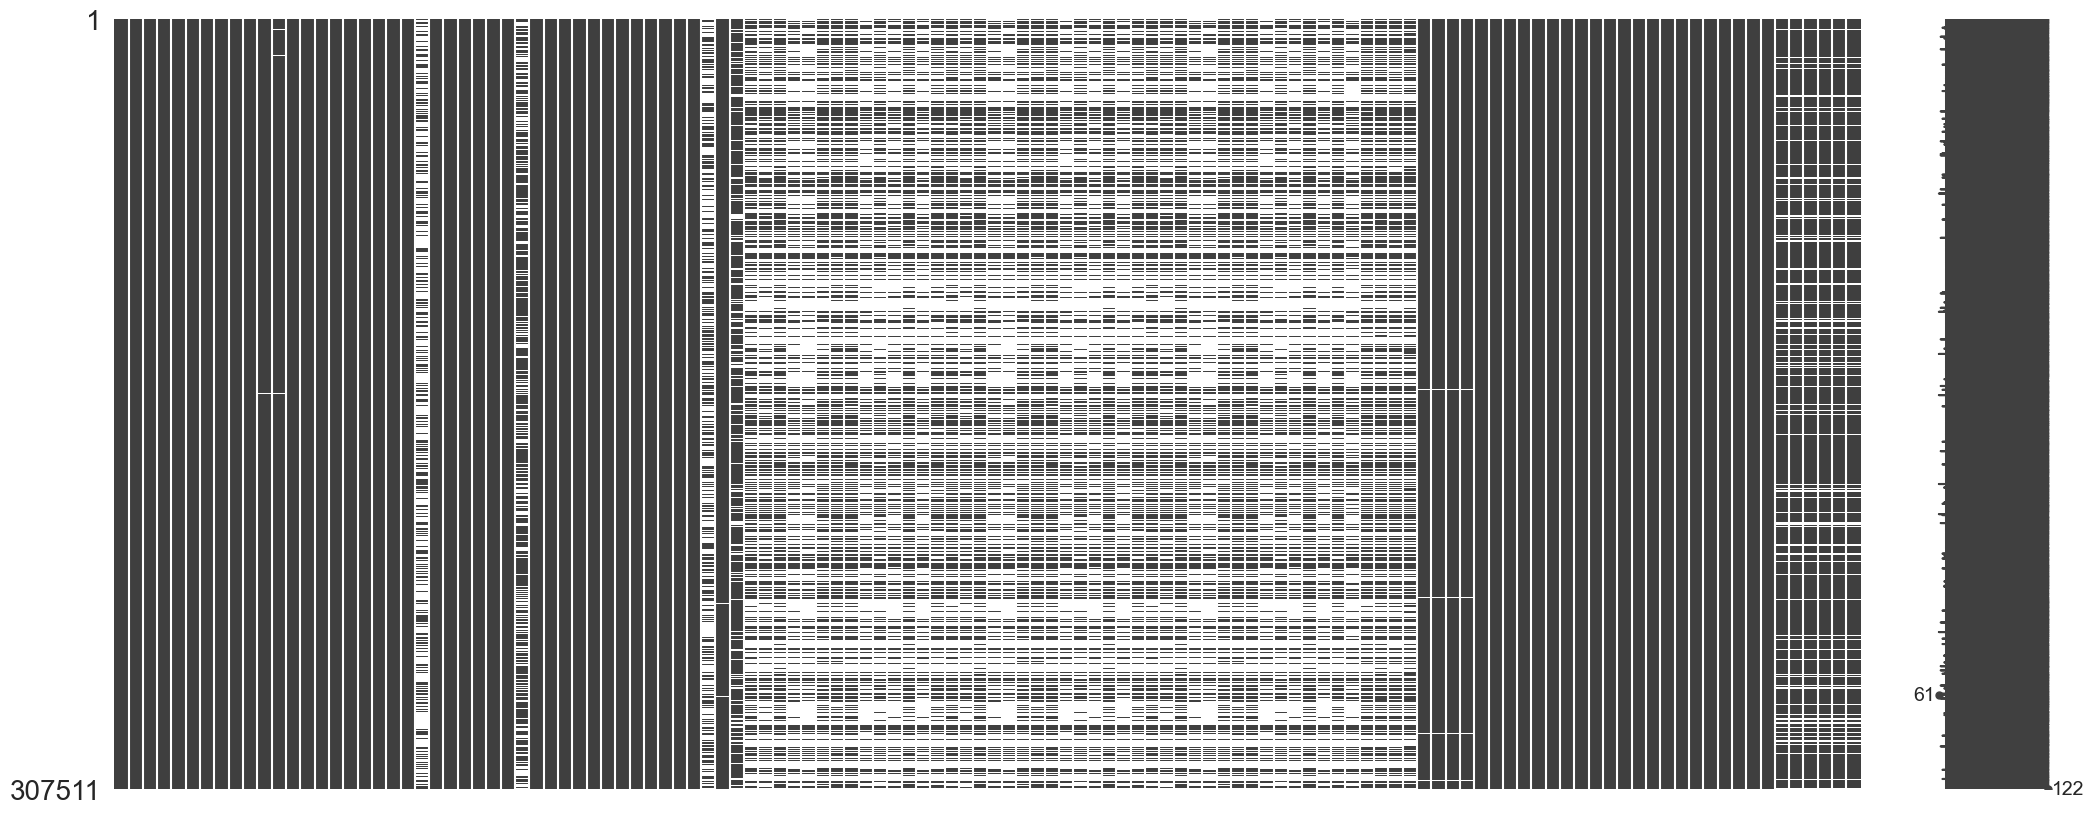

In [69]:
# Display missing values matrix
msno.matrix(data_app_train)
plt.show()

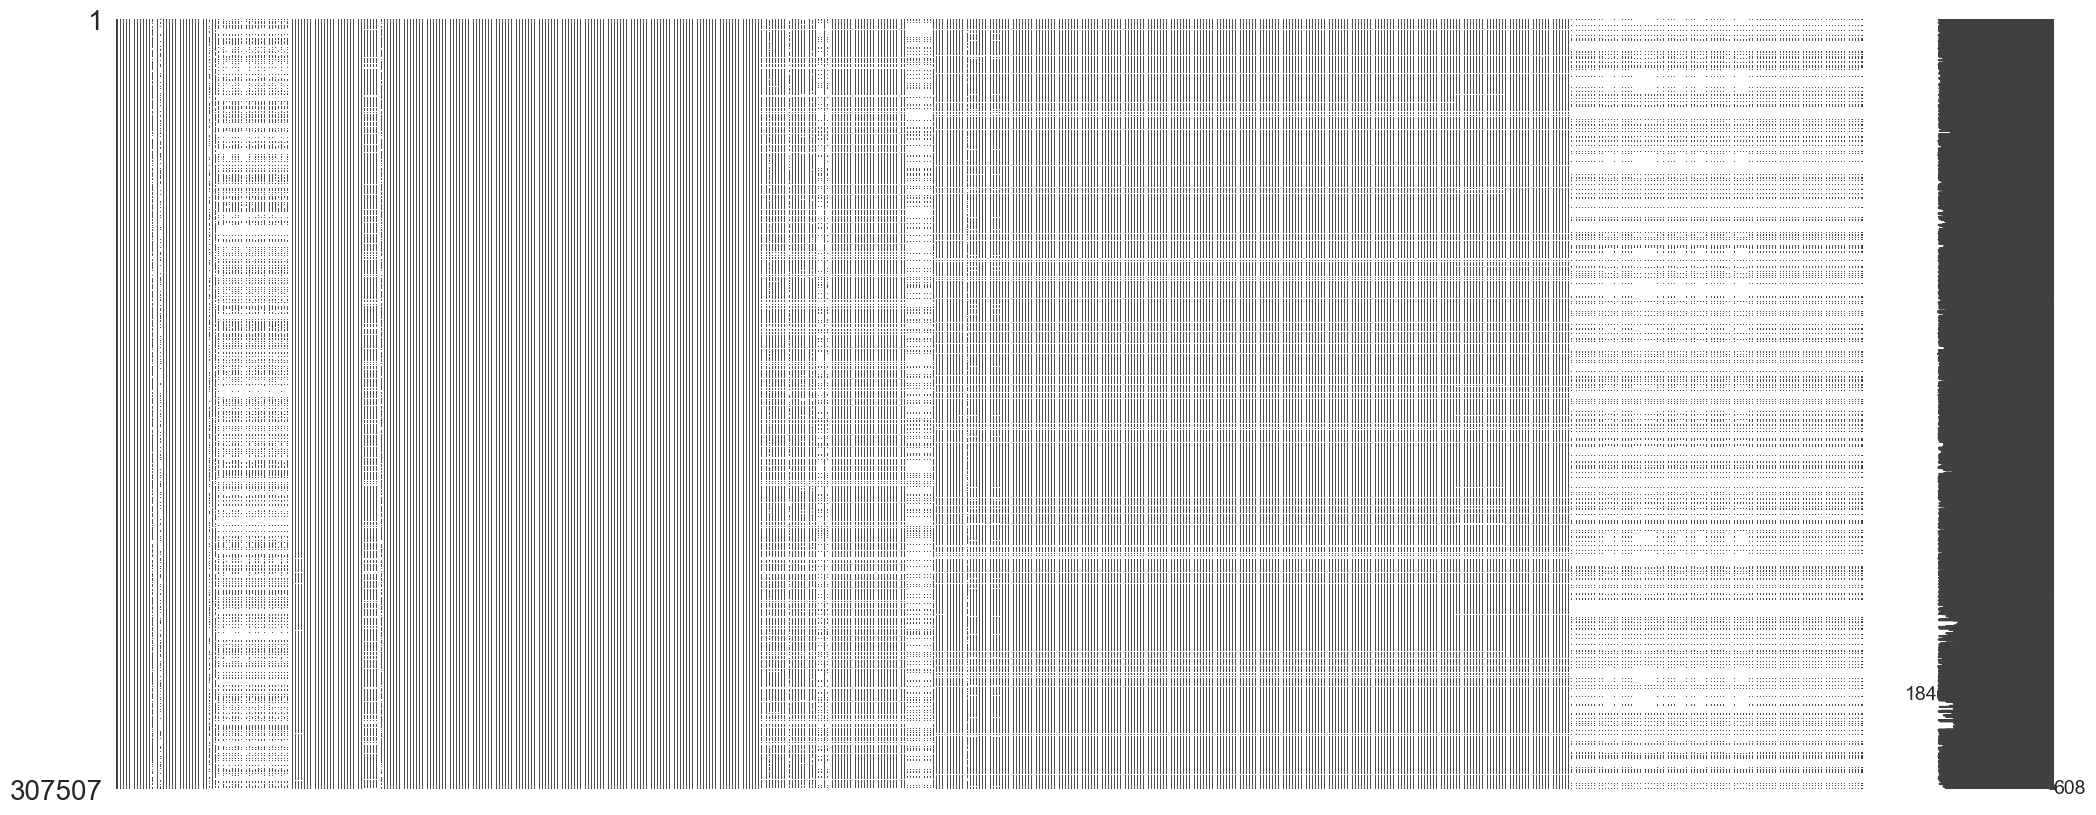

In [71]:
# Display missing values matrix of the final training dataset
msno.matrix(merged_df)
plt.show()

In [72]:
# Print number of missing values
nan_values = data_app_train.isna().sum().sum()
print("Missing values = {} ({:.2%})".format(nan_values, nan_values/data_app_train.size))

Missing values = 9152465 (24.40%)


## Duplicates

Let's check if there are duplicates in the dataset.

In [73]:
# Check for duplicates
duplicates = data_app_train.duplicated()
print(str(data_app_train[duplicates].size) + " duplicates found in the dataset application_train.")

0 duplicates found in the dataset application_train.


In [74]:
# Check for duplicates on ID
duplicates = data_app_train.duplicated(subset='SK_ID_CURR')
print(str(data_app_train[duplicates].size) + " duplicates found in the column SK_ID_CURR.")

0 duplicates found in the column SK_ID_CURR.


# Outliers

In [77]:
# Copy dataframe before exploration
train_df = data_app_train.copy()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selects the numerical columns only
df_numeric = merged_df.select_dtypes(include=[np.number])

# Configuration of the graphic
plt.figure(figsize=(20, 10))

# boxplot for every variable
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)
plt.title('Boxplot de toutes les colonnes numériques')
plt.show()

# Data exploration

In [ ]:
# Define usefull variables
TARGET = 'TARGET' 
ID = 'SK_ID_CURR'

### TARGET distribution

*TARGET* : 
* 0 : if the loan was repaid on time
* 1 : if the client had payment difficulties.

In [ ]:
# Display the target value counts
display(train_df[TARGET].value_counts())

# Display the target distribution
display_histplot(train_df, x=TARGET, title="Target distribution")

### TARGET correlation

In [ ]:
data leakage

Let's check the variables correlations.

In [ ]:
# Fliter numerical columns only
numeric_df = train_df.select_dtypes(include=[np.number])

# Calculate correlations on numericacal columns
correlations = numeric_df.corr()

# Display correlations
print(correlations)

I display the target most correlated variables.

In [ ]:
# Sort correlations by target
corr_sorted = correlations.sort_values(by=TARGET)[TARGET]

# Display correlations
print('Most positive correlations:\n', corr_sorted.tail(10))
print('\nMost negative correlations:\n', corr_sorted.head(10))

The *external source* variables are the most correlated to the target. Let's check their distribution.

In [ ]:
for ext_col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    display_kdeplot(train_df, x=ext_col, hue=TARGET, common_norm=False,
                     title=ext_col+" density")

### TARGET per category

In [ ]:
# Display the repay failure (target=1) percentage for selected categorical column
def display_repay_failure_category(data, column, limit=None):

    grouped_data = data[[column, TARGET]].groupby(column).mean().reset_index()
    grouped_data = grouped_data.sort_values(by=TARGET, ascending=False)

    categories = grouped_data[column].unique()
    n_categories = grouped_data[column].nunique()
    avg_len = sum(map(len, categories)) / n_categories

    # Rotate longer category strings
    xrotation=70 if avg_len > 4 else 0
    
    # Figsize according to number of categories
    figsize=(6, 6) if n_categories < 4 else (12, 6)

    display_barplot(grouped_data, x=column, y=TARGET, xrotation=xrotation, figsize=figsize,
                    title="Repay failure (target==1) by " + column, ylabel="Repay failure %")

I display the repay failure percentage for each categorical variable.

In [ ]:
for col in train_df.select_dtypes(object).columns:
    display_repay_failure_category(train_df, col)

### DAYS variables

All *DAYS_* feature are negative because they are recorded relative to the current loan application.

In [ ]:
# Display AGE variables
display((train_df['DAYS_BIRTH'] /-365).describe())
display((train_df['DAYS_EMPLOYED'] /-365).describe())
display((train_df['DAYS_REGISTRATION'] /-365).describe())

It looks like the *DAYS_EMPLOYED* has anomalies. The minimal value is about -1000 years.

Let's check the *DAYS_EMPLOYED* distribution.

In [ ]:
# Display days employed distribution
display_histplot(train_df, x='DAYS_EMPLOYED', bins=10, title="Employed days distribution")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculates IQR and limits for outliers
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculates the min and max limits where outliers are located for DAYS_EMPLOYED
lower_bound, upper_bound = detect_outliers(train_df, 'DAYS_EMPLOYED')

# Filters DataFrame to show only outliers
outliers = train_df[(train_df['DAYS_EMPLOYED'] < lower_bound) | (train_df['DAYS_EMPLOYED'] > upper_bound)]

# Shows results
print("Outliers for 'DAYS_EMPLOYED':")
pd.set_option('display.max_columns', None)
display(outliers)

# Visualise the outliers
plt.figure(figsize=(10, 6))
sns.histplot(train_df, x='DAYS_EMPLOYED', bins=10, kde=True, color='blue')
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title("Employed days distribution with Outliers")
plt.legend()
plt.show()


In [ ]:
# Normalisation Min-Max so that numerical data are between -1 and 1
train_df['DAYS_EMPLOYED_normalized'] = -1 + 2 * ((train_df['DAYS_EMPLOYED'] - train_df['DAYS_EMPLOYED'].min()) / (train_df['DAYS_EMPLOYED'].max() - train_df['DAYS_EMPLOYED'].min()))

# Creates a boxplot for normalized data
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['DAYS_EMPLOYED_normalized'])
plt.title('Normalized Boxplot for DAYS_EMPLOYED')
plt.show()


In [ ]:
# Count the number of negative 'DAYS_EMPLOYED'
negative_count = (train_df['DAYS_EMPLOYED'] < 0).sum()

# Count the number of positive 'DAYS_EMPLOYED'
positive_count = (train_df['DAYS_EMPLOYED'] > 0).sum()

# Count the number of positive 'DAYS_EMPLOYED'
zero_count = (train_df['DAYS_EMPLOYED'] == 0).sum()

# Results
print("Nombre de valeurs négatives dans 'DAYS_EMPLOYED':", negative_count)
print("Nombre de valeurs positives dans 'DAYS_EMPLOYED':", positive_count)
print("Nombre de valeurs égales à zero dans 'DAYS_EMPLOYED':", zero_count)


In [ ]:
# Creates a boxplot for 'DAYS_EMPLOYED'
plt.figure(figsize=(10, 6))  
sns.boxplot(x=train_df['DAYS_EMPLOYED'])
plt.title('Boxplot for DAYS_EMPLOYED')
plt.show()


In [ ]:
# Display the new distribution
display_histplot(train_df, x='DAYS_EMPLOYED', kde=True, bins=20,
                 title="Employed days distribution (anomalies removed)")

I decide to replace the anomalies with NaN.

In [ ]:
# Get anomalies days employed value
anom_value = train_df['DAYS_EMPLOYED'].max()

# Replace anomalies value by NaN
train_df['DAYS_EMPLOYED'] = train_df['DAYS_EMPLOYED'].replace({anom_value: np.nan})

# Display the new distribution
display_histplot(train_df, x='DAYS_EMPLOYED', kde=True, bins=20,
                 title="Employed days distribution (anomalies removed)")

I make sure employement days are correct.

In [ ]:
# Check if error in days
print('Number of employed before birth : ' + \
      str(train_df[train_df['DAYS_EMPLOYED'] < train_df['DAYS_BIRTH']].shape[0]))
print('Number of registration before birth : ' + \
      str(train_df[train_df['DAYS_REGISTRATION'] < train_df['DAYS_BIRTH']].shape[0]))

In [ ]:
# Remove entry with incorect days
remove_idx = train_df[train_df['DAYS_REGISTRATION'] < train_df['DAYS_BIRTH']].index
train_df = train_df.drop(remove_idx)

I create a new estimated age (*EST_AGE*) variable.

In [ ]:
# Create estimated age variable
train_df['EST_AGE'] = (train_df['DAYS_BIRTH']/-365)

# Display age distribution
display_histplot(train_df, x='EST_AGE', bins=20, title="Estimated age distribution")

# Display age distribution by target
display_kdeplot(train_df, x='EST_AGE', hue=TARGET, title="Estimated age density",
                common_norm=False)

In [ ]:
# Age information into a separate dataframe
age_df = train_df[['TARGET', 'EST_AGE']].copy()

# Bin the age data
age_df['AGE_GROUP'] = pd.cut(age_df['EST_AGE'], bins = np.linspace(20, 70, num = 11))
display(age_df.head())

# Group by age group
age_grouped_df = age_df.groupby('AGE_GROUP').mean()
display(age_grouped_df)

In [ ]:
# Display failure to repay by age group
display_barplot(x=age_grouped_df.index.astype(str), y=100*age_grouped_df[TARGET],
                title="Repay failure (target==1) by age group", xrotation=75, ylabel="Repay failure %")

I remove the *EST_AGE* variable after the exploration and also the code gender because we don't want to discriminate

In [ ]:
# Remove the estimated age variable
train_df = train_df.drop(columns='EST_AGE')